In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings; warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
sns.set_theme(style='whitegrid')

###### Вынесем в эту строку все функции для предобработки/обработки данных, которые будем использовать далее

In [2]:
values = {}
# в этот словарь каждый раз будем добавлять пару столбец : значение, на которое будем заменять пропущенные.


quantative_list = []
nominative_list = []
# В эти два списка будем вносить названия колонок датафрейма, содержащие номинативные или количественные данные соответственно
# в этом нам поможет функция column_type.


def column_type():
    for col in list(df.columns):
        if ((df[col].dtype == 'object') & (col not in nominative_list)):
            nominative_list.append(col)
        elif ((df[col].dtype != 'object') & (col not in quantative_list)):
            quantative_list.append(col)
    print(f"Столбцов с количественными значениями: {len(quantative_list)}")
    print(f"Столбцов с номинативными значениями: {len(nominative_list)}")
    print("Все пропущенные значения в столбцах были замещены согласно оговоренному условию. Данные готовы для анализа")


def col_general_info(df):
    for col in list(df.columns):
        print(col)
        print(df[col].unique())
        print(df[col].value_counts())
        print()
# функция для предварительного просмотра информации по данным в колонках датасета.


def nominative(*cols):
    for col in cols:
        find_most_recent = df[col].value_counts(ascending=False)
        mode = find_most_recent.index[0]
        display(df[col].describe())
        print(f"Наиболее часто встречающееся значение-мода : {mode}")
        sns.countplot(data=df, x=col)
        values.update({col: mode})
        df.fillna(value=values, inplace=True)
# функция по определению основных параметров столбца с номинативными данными. Заменяет пропуски на моду.


def quant(*cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].quantile(0.5)
        Q3 = df[col].quantile(0.75)
        IQ_range = Q3 - Q1
        S = Q1 - 1.5*IQ_range
        F = Q3 + 1.5*IQ_range
        display(df[col].describe())
        print(f"1 квартиль: {Q1} \n2 квартиль {Q2} \n3 квартиль: {Q3} \nГраницы выбросов: [{S}:{F}]")
        sns.countplot(data=df, x=col)
        values.update({col: Q2})
        df.fillna(value=values, inplace=True)
# аналогичная функция по определению основных параметров столбца с количественными данными. Также заменяет пропуски на медиану.


def draw_boxplot(*cols):
    for col in cols:
        fig, ax = plt.subplots(figsize = (8, 4))
        sns.boxplot(x=col, y='score', data=df, ax=ax)
        ax.set_title('Boxplot for ' + col)
        plt.show()

In [3]:
df = pd.read_csv('stud_math.csv')
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
113,GP,M,15,U,LE3,T,4.0,2.0,teacher,other,course,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,3.0,5.0,2.0,3.0,10.0,95.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,course,father,NaN,1.0,0.0,no,yes,no,no,yes,-3.0,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
357,MS,F,17,U,LE3,NaN,3.0,2.0,services,other,reputation,mother,2.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,yes,1.0,2.0,3.0,5.0,2.0,55.0
355,MS,F,18,U,GT3,T,3.0,3.0,services,services,course,father,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,NaN,3.0,4.0,5.0,0.0,45.0


In [4]:
df.rename(columns={'studytime, granular': 'studytime_granular'})
# переименуем столбец 'studytime, granular' к более удобному и читаемому виду

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


#### Более подробно взглянем на данные в столбцах:

In [5]:
col_general_info(df)

school
['GP' 'MS']
GP    349
MS     46
Name: school, dtype: int64

sex
['F' 'M']
F    208
M    187
Name: sex, dtype: int64

age
[18 17 15 16 19 22 20 21]
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

address
['U' nan 'R']
U    295
R     83
Name: address, dtype: int64

famsize
[nan 'GT3' 'LE3']
GT3    261
LE3    107
Name: famsize, dtype: int64

Pstatus
['A' nan 'T']
T    314
A     36
Name: Pstatus, dtype: int64

Medu
[ 4.  1.  3.  2. nan  0.]
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Fedu
[ 4.  1.  2.  3. 40. nan  0.]
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Mjob
['at_home' 'health' 'other' 'services' 'teacher' nan]
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

Fjob
['teacher' 'other' nan 'health' 'services' 'at_home']
other       197
services    102
teacher      29
at_home  

Предварительный осмотр данных говорит нам что:
- в столбцах 'school', 'sex' пропущенных и посторонних значений нет, все остальные столбцы содержат пропущенные значения
- учеников со школы GP гораздо больше. Нужно будет проверить зависимость между видом школы и баллами
- среди учащихся девочек больше чем мальчиков
- в основном семьи полные и родители живут вместе
- среди матерей учеников большинство с высшим образованием, хотя и не мало с 9 классами за спиной 
- отцы же в большинстве случаев даже без средне специального образования. Выброс в виде значения 40 (не по условию)
- матери как основные опекуны детей
- подавляющее большинство детей тратит на дорогу менее 15 мин.
- количество внеучебных неудач стремится к 0
- дополнительная образовательная поддержка значительно преобладает
- данные по дополнительным внеучебным занятиям практически поровну разделились на да/нет
- почти все посещали детские сады и хотят в высшее учебное заведение
- почти у всех есть интернет. стоит проверить зависимость между наличием интернета и успеваемостью
- половина детей в благополучных семемьях. Возможно есть зависимость между успеваемостью и "погодой" в семье
- большой разброс значений в количестве прогулов. Есть значительные выбросы, влияющие на общую картину
<h4> В рамках данного проекта все пропущенные значения будем заменять следующим образом:
<ul>
    <li>для количественных значений на медиану</li>
    <li>для номинативных - на моду</li>
</h4>

###### В самом начале анализа разберем столбец с количеством пропусков занятий 'absences', т.к. там больше всего выбросов и это будет влиять на дальнейшую работу

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

1 квартиль: 0.0 
2 квартиль 4.0 
3 квартиль: 8.0 
Границы выбросов: [-12.0:20.0]


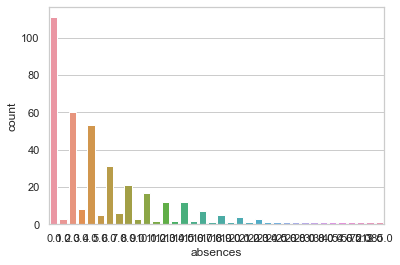

In [6]:
quant('absences')

Мы понимаем, что согласно расчетам Границы выбросов: [-12.0:20.0]. В нашем случае количество не может быть отрицательным. Поэтому предлагаю сдвинуть границы рассматриваемых значений на [0:25]. В таком случае, отсеяв значения вне числового промежутка, у нас остается:

In [7]:
df[df.absences <= 25].school.count()

385

385 значений - это почти 97,5% от первоначальных. Предлагаю далее работать именно с оставшейся частью.

In [8]:
df = df[df.absences <= 25]

###### Разберем несколько столбцов с целью показать работу функций. Начнем со столбца 'age'

count    385.000000
mean      16.677922
std        1.264563
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

1 квартиль: 16.0 
2 квартиль 17.0 
3 квартиль: 18.0 
Границы выбросов: [13.0:21.0]


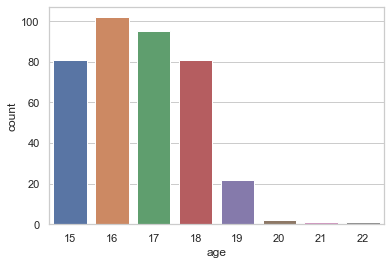

In [9]:
quant('age')
# в общем пуле по количеству доминируют учащиеся с 15-18 лет

###### Столбец 'address'

Ранее мы выяснили, что столбец содержит 395-(295+83) = 17 пустых значений, что является 4.3% от общего числа записей. 
Предлагаю заполнить их значениеями U, т.к. встречается чаще всего.


In [10]:
GP = df[df.school == 'GP']['address'].value_counts()
MS = df[df.school == 'MS']['address'].value_counts()

display(GP)
display(MS)

# мы видим, что чаще всего ученики из школы GP проживают по адресу U, и наоборот - ученики школы MS по адресу R.

U    270
R     58
Name: address, dtype: int64

R    23
U    17
Name: address, dtype: int64

count     368
unique      2
top         U
freq      287
Name: address, dtype: object

Наиболее часто встречающееся значение-мода : U


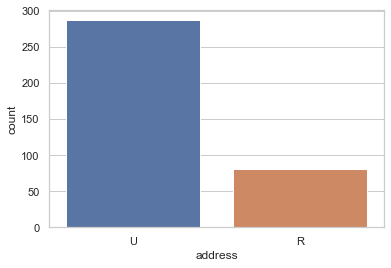

In [11]:
nominative('address')

Для всех остальных стобцов применим функции quant/nominative, передав в качестве аргументов списки столбцов, предварительно поделенных на количественные и номинативные

In [12]:
column_type()

Столбцов с количественными значениями: 13
Столбцов с номинативными значениями: 17
Все пропущенные значения в столбцах были замещены согласно оговоренному условию. Данные готовы для анализа


count     385
unique      2
top        GP
freq      340
Name: school, dtype: object

Наиболее часто встречающееся значение-мода : GP


count     385
unique      2
top         F
freq      201
Name: sex, dtype: object

Наиболее часто встречающееся значение-мода : F


count     385
unique      2
top         U
freq      304
Name: address, dtype: object

Наиболее часто встречающееся значение-мода : U


count     359
unique      2
top       GT3
freq      254
Name: famsize, dtype: object

Наиболее часто встречающееся значение-мода : GT3


count     342
unique      2
top         T
freq      309
Name: Pstatus, dtype: object

Наиболее часто встречающееся значение-мода : T


count       366
unique        5
top       other
freq        129
Name: Mjob, dtype: object

Наиболее часто встречающееся значение-мода : other


count       349
unique        5
top       other
freq        193
Name: Fjob, dtype: object

Наиболее часто встречающееся значение-мода : other


count        368
unique         4
top       course
freq         136
Name: reason, dtype: object

Наиболее часто встречающееся значение-мода : course


count        355
unique         3
top       mother
freq         243
Name: guardian, dtype: object

Наиболее часто встречающееся значение-мода : mother


count     376
unique      2
top        no
freq      328
Name: schoolsup, dtype: object

Наиболее часто встречающееся значение-мода : no


count     348
unique      2
top       yes
freq      213
Name: famsup, dtype: object

Наиболее часто встречающееся значение-мода : yes


count     345
unique      2
top        no
freq      196
Name: paid, dtype: object

Наиболее часто встречающееся значение-мода : no


count     371
unique      2
top       yes
freq      192
Name: activities, dtype: object

Наиболее часто встречающееся значение-мода : yes


count     369
unique      2
top       yes
freq      291
Name: nursery, dtype: object

Наиболее часто встречающееся значение-мода : yes


count     365
unique      2
top       yes
freq      347
Name: higher, dtype: object

Наиболее часто встречающееся значение-мода : yes


count     351
unique      2
top       yes
freq      296
Name: internet, dtype: object

Наиболее часто встречающееся значение-мода : yes


count     355
unique      2
top        no
freq      236
Name: romantic, dtype: object

Наиболее часто встречающееся значение-мода : no


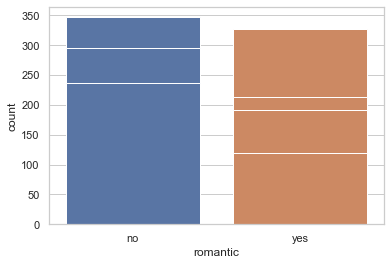

In [13]:
nominative(*nominative_list)

count    385.000000
mean      16.677922
std        1.264563
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

1 квартиль: 16.0 
2 квартиль 17.0 
3 квартиль: 18.0 
Границы выбросов: [13.0:21.0]


count    382.000000
mean       2.746073
std        1.106375
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

1 квартиль: 2.0 
2 квартиль 3.0 
3 квартиль: 4.0 
Границы выбросов: [-1.0:7.0]


count    362.000000
mean       2.607735
std        2.252913
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

1 квартиль: 2.0 
2 квартиль 2.0 
3 квартиль: 3.0 
Границы выбросов: [0.5:4.5]


count    357.000000
mean       1.439776
std        0.699027
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

1 квартиль: 1.0 
2 квартиль 1.0 
3 квартиль: 2.0 
Границы выбросов: [-0.5:3.5]


count    378.000000
mean       2.039683
std        0.846909
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

1 квартиль: 1.0 
2 квартиль 2.0 
3 квартиль: 2.0 
Границы выбросов: [-0.5:3.5]


count    364.000000
mean       0.332418
std        0.743711
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

1 квартиль: 0.0 
2 квартиль 0.0 
3 квартиль: 0.0 
Границы выбросов: [0.0:0.0]


count    378.000000
mean      -6.119048
std        2.540726
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

1 квартиль: -6.0 
2 квартиль -6.0 
3 квартиль: -3.0 
Границы выбросов: [-10.5:1.5]


count    359.000000
mean       3.935933
std        0.929838
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

1 квартиль: 4.0 
2 квартиль 4.0 
3 квартиль: 5.0 
Границы выбросов: [2.5:6.5]


count    376.000000
mean       3.239362
std        0.985843
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

1 квартиль: 3.0 
2 квартиль 3.0 
3 квартиль: 4.0 
Границы выбросов: [1.5:5.5]


count    377.000000
mean       3.108753
std        1.111522
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

1 квартиль: 2.0 
2 квартиль 3.0 
3 квартиль: 4.0 
Границы выбросов: [-1.0:7.0]


count    370.000000
mean       3.527027
std        1.397083
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

1 квартиль: 3.0 
2 квартиль 4.0 
3 квартиль: 5.0 
Границы выбросов: [0.0:8.0]


count    385.000000
mean       4.914286
std        5.418470
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       25.000000
Name: absences, dtype: float64

1 квартиль: 0.0 
2 квартиль 4.0 
3 квартиль: 7.0 
Границы выбросов: [-10.5:17.5]


count    379.000000
mean      52.374670
std       23.094744
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

1 квартиль: 40.0 
2 квартиль 55.0 
3 квартиль: 70.0 
Границы выбросов: [-5.0:115.0]


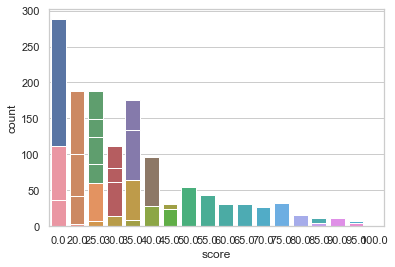

In [14]:
quant(*quantative_list)

#### Столбец 'Fedu'

count    385.000000
mean       2.571429
std        2.189158
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

1 квартиль: 2.0 
2 квартиль 2.0 
3 квартиль: 3.0 
Границы выбросов: [0.5:4.5]


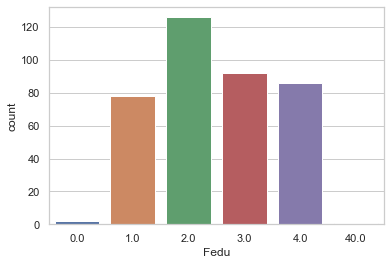

In [15]:
quant('Fedu')
# видим 1 выбивающееся значение 40. Предположим что во время заполнения ошиблись, и хотели написать 4.
# Остальные пропущенные заменим на медиану = 2

In [16]:
df.Fedu[df.index[df.Fedu == 40]] = 4

#### Далее рассмотрим коэффициент корреляции

In [17]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.164859,-0.165309,0.089185,-0.015138,0.209527,0.015138,0.056399,0.031658,0.142667,-0.074062,0.165467,-0.150566
Medu,-0.164859,1.000000,0.598023,-0.171105,0.086654,-0.245390,-0.086654,-0.012615,0.028294,0.056551,-0.056957,0.101455,0.214369
Fedu,-0.165309,0.598023,1.000000,-0.117976,0.005320,-0.271069,-0.005320,-0.019028,-0.030044,0.043012,0.004683,0.006197,0.123477
traveltime,0.089185,-0.171105,-0.117976,1.000000,-0.086897,0.055915,0.086897,-0.015381,-0.006657,0.046053,-0.049012,-0.015870,-0.049811
studytime,-0.015138,0.086654,0.005320,-0.086897,1.000000,-0.173785,-1.000000,0.044568,-0.119390,-0.044003,-0.072759,-0.092044,0.112908
failures,0.209527,-0.245390,-0.271069,0.055915,-0.173785,1.000000,0.173785,-0.038978,0.087130,0.111087,0.073069,0.096099,-0.329384
"studytime, granular",0.015138,-0.086654,-0.005320,0.086897,-1.000000,0.173785,1.000000,-0.044568,0.119390,0.044003,0.072759,0.092044,-0.112908
famrel,0.056399,-0.012615,-0.019028,-0.015381,0.044568,-0.038978,-0.044568,1.000000,0.167709,0.067097,0.081442,-0.106495,0.067145
freetime,0.031658,0.028294,-0.030044,-0.006657,-0.119390,0.087130,0.119390,0.167709,1.000000,0.282704,0.062099,0.018100,0.018953
goout,0.142667,0.056551,0.043012,0.046053,-0.044003,0.111087,0.044003,0.067097,0.282704,1.000000,-0.010976,0.096347,-0.115608


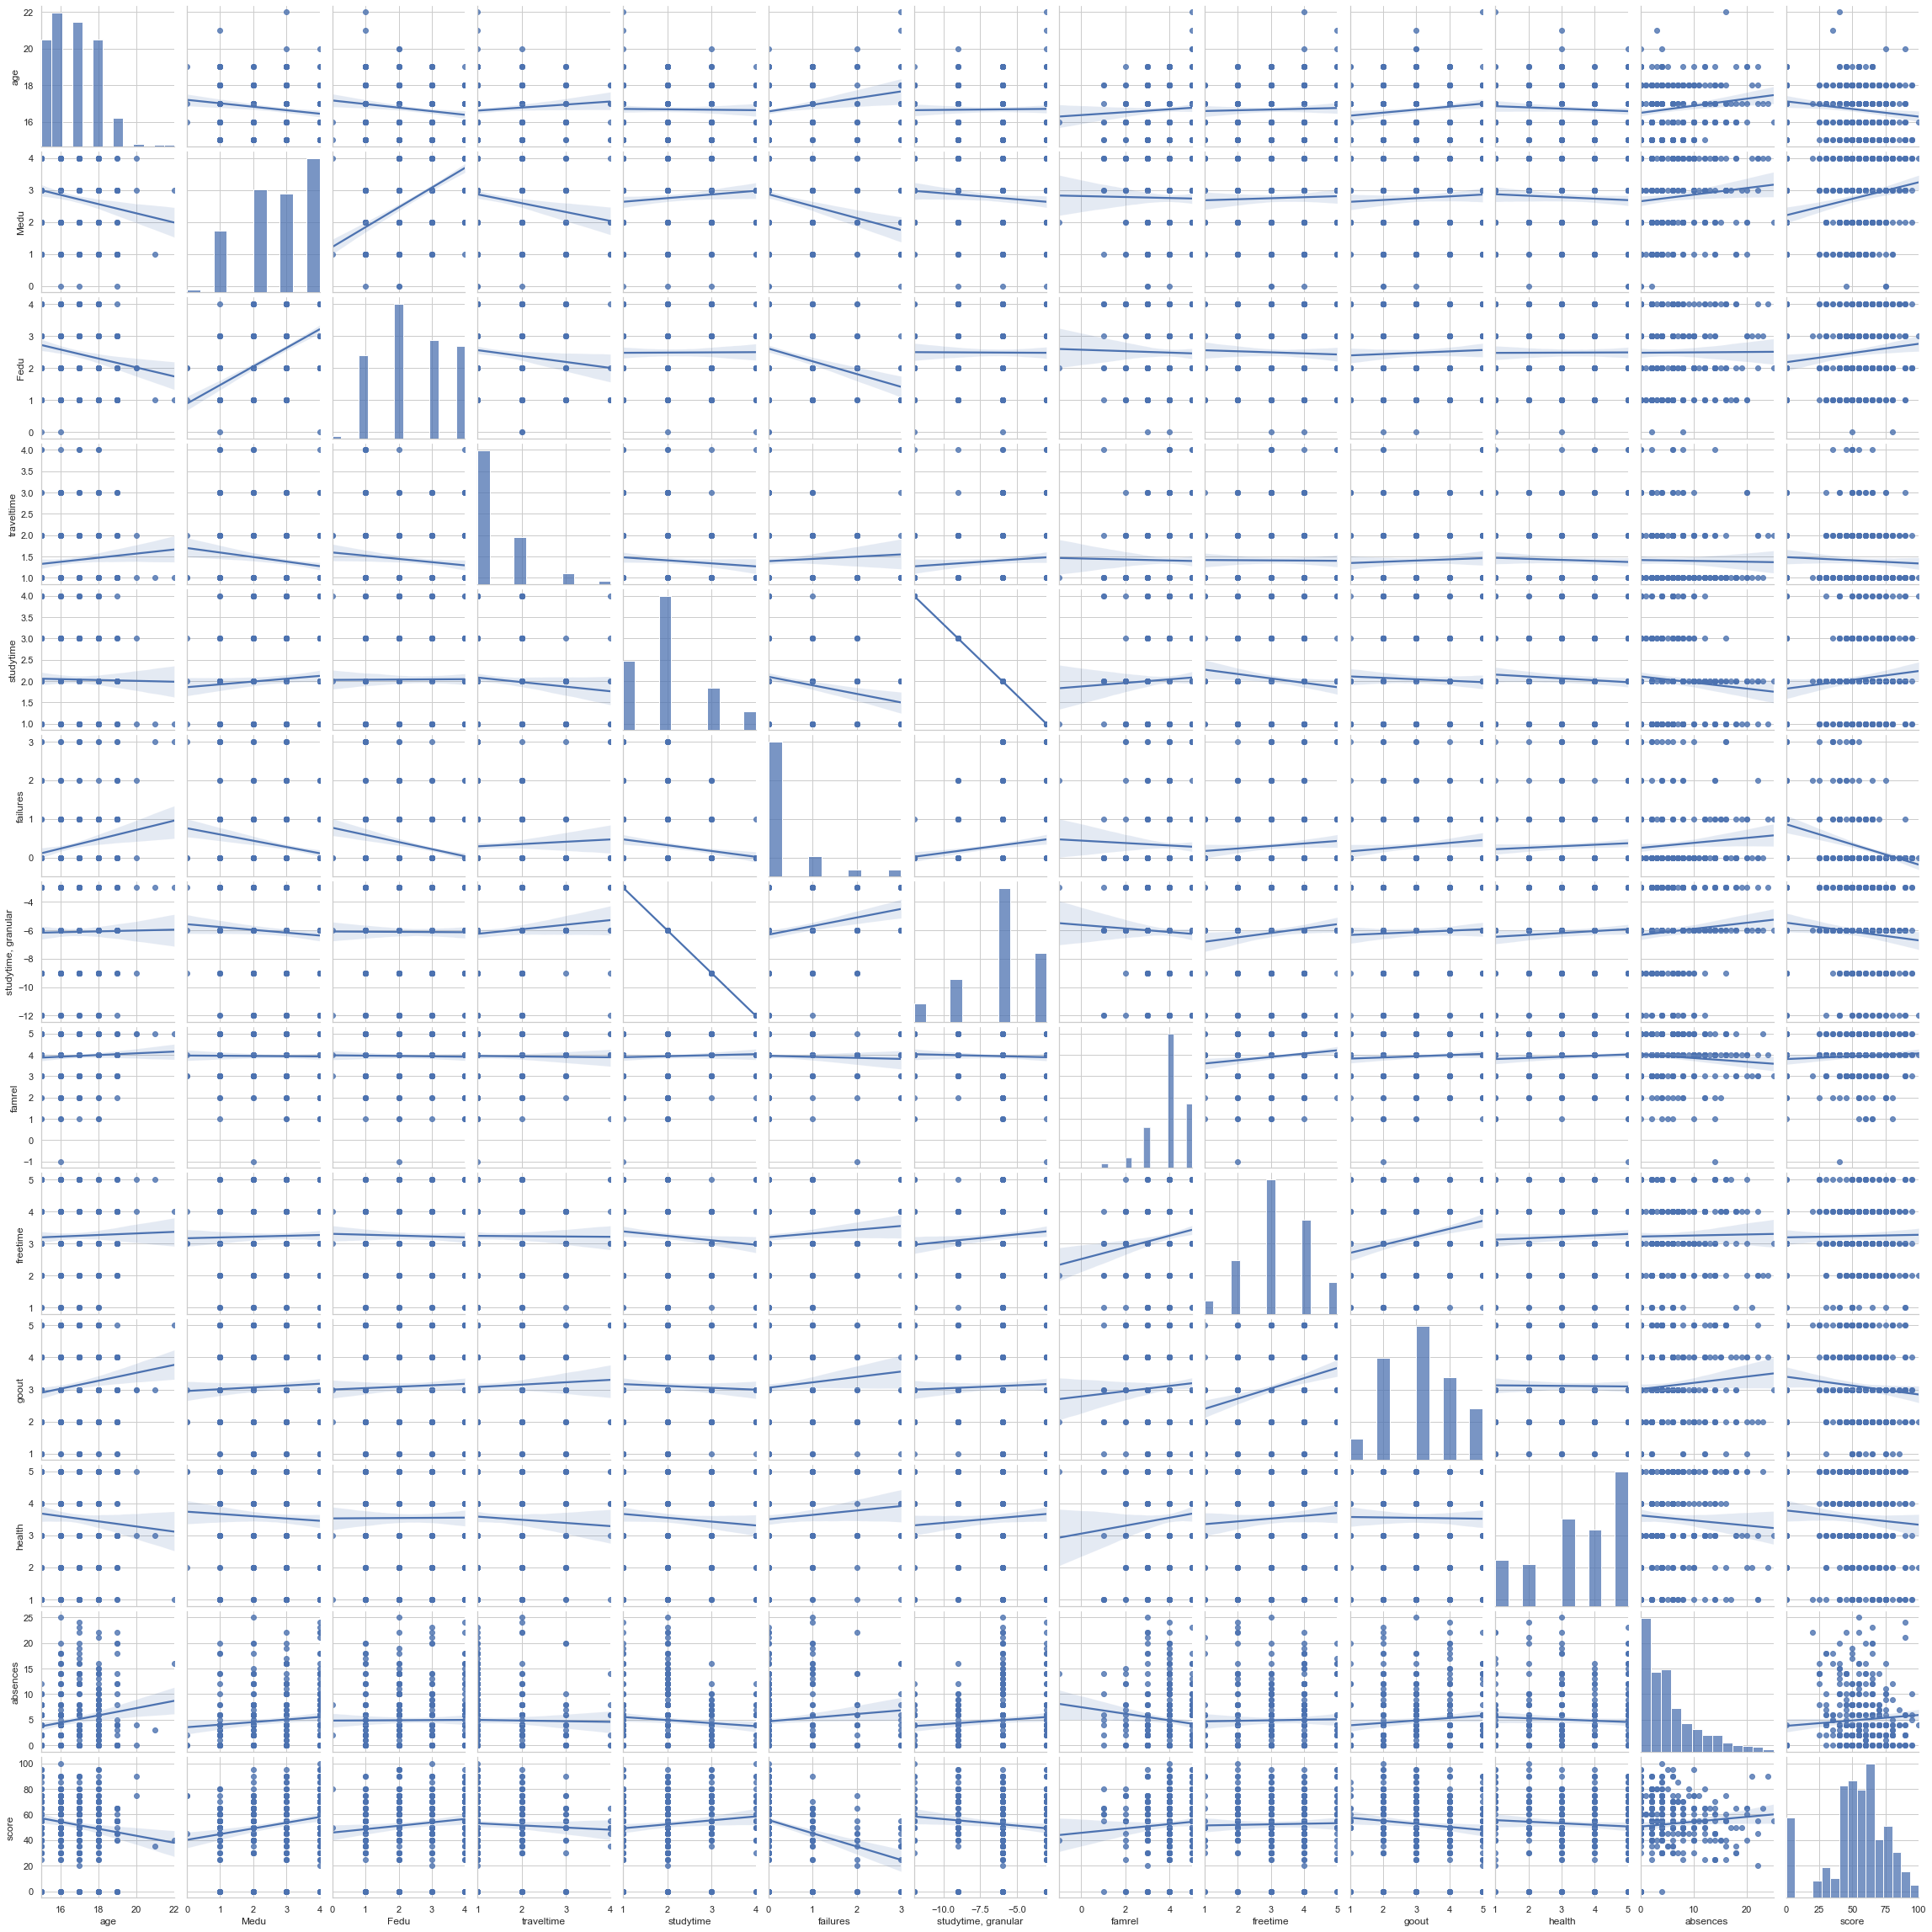

In [18]:
sns.pairplot(df, kind = 'reg')

Оценивая значения коэффициента корреляции для различных столбцов, можно сделать предварительный вывод, что сильнее всего видна взаимосвязь финальной оценки и:
- кол-вом неудач (failures)
- образованием матери (Medu)
- возрастом (age)
- образованием отца (Fedu)
- времени с друзьями (goout)
- временем на учебу (studytime)
Все остальные незначительно влияют на итоговый балл (коэф. < 0.1). 

#### Для номинативных данных построим диаграммы типа boxplot.

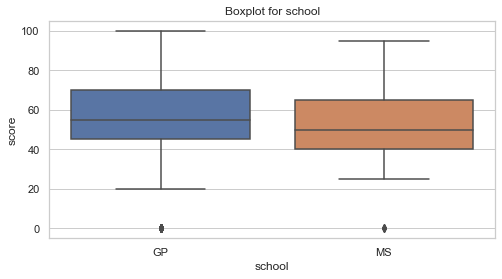

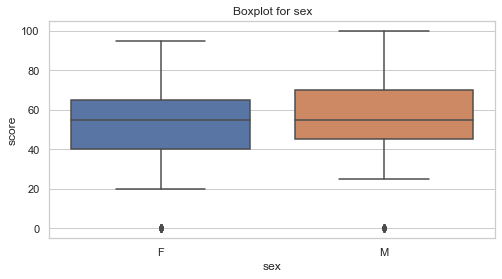

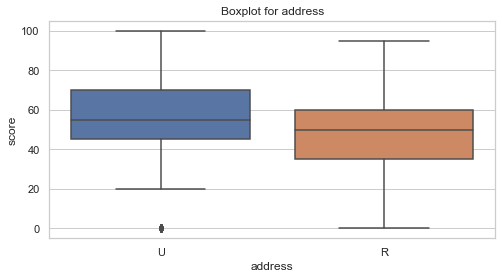

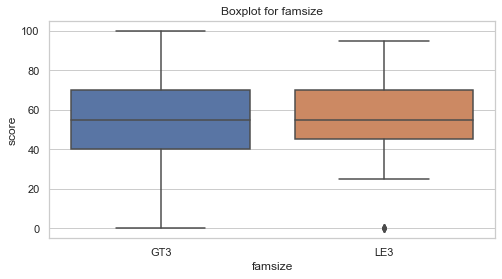

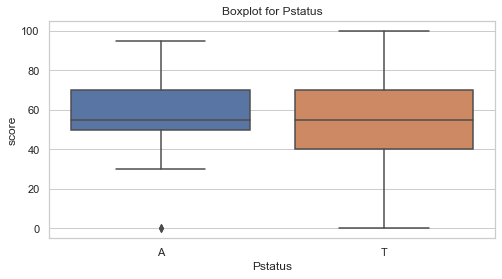

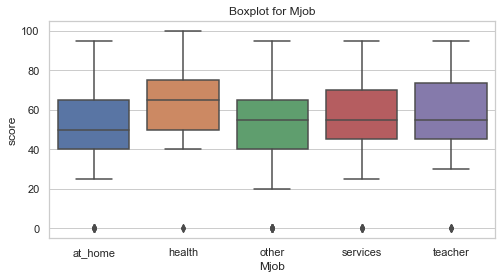

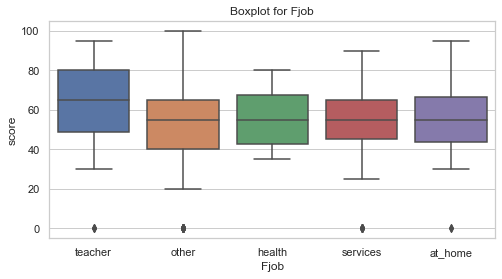

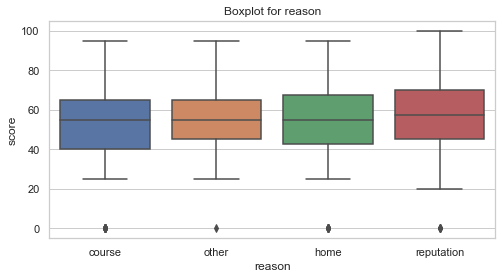

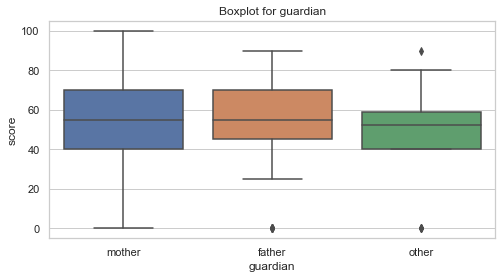

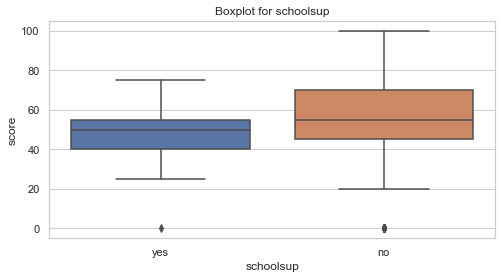

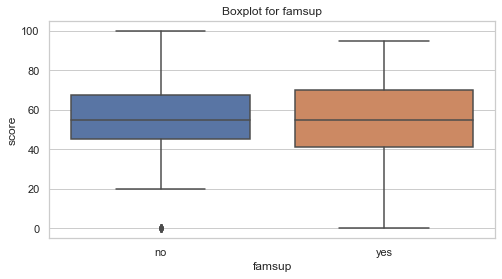

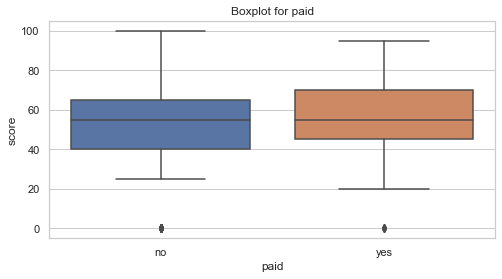

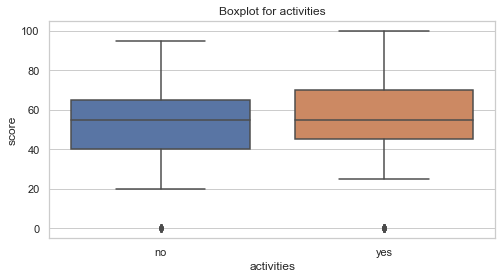

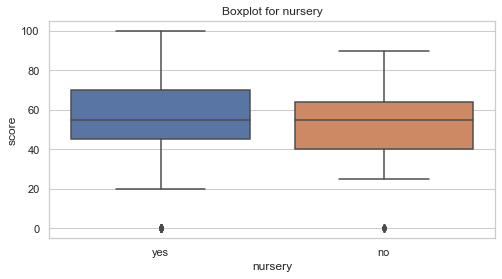

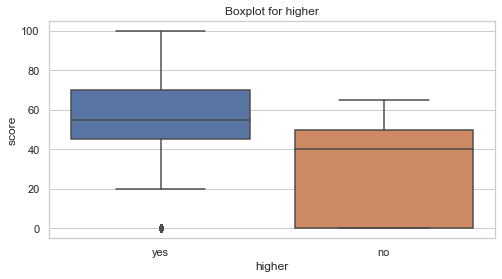

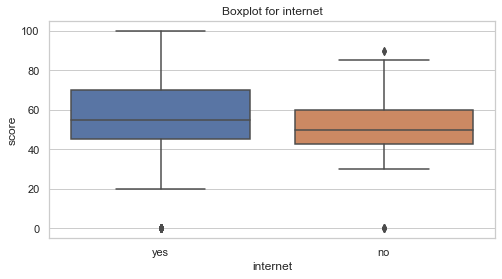

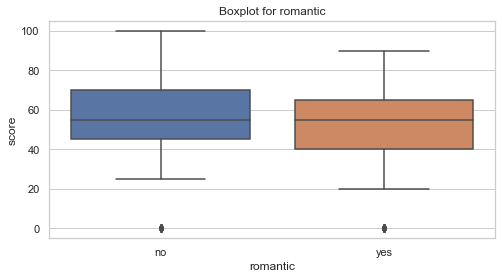

In [19]:
draw_boxplot(*nominative_list)

Данные по следующим столбцам имеют влияние на итоговый балл:
- школа
- тип адреса ученика
- место работы матери
- место работы отца
- причина выбора школы (возможно)
- желание получить высшее образование
- наличие интернета 

#### Тест Стьюдента

In [38]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [39]:
for col in nominative_list:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Подводя итог, можно сказать, что в нашем случае значение будут иметь колонки:
- кол-во неудач (failures)
- образование матери (Medu)
- возраст (age)
- образование отца (Fedu)
- время с друзьями (goout)
- время на учебу (studytime)
- пол (sex)
- адрес (address)
- место работы матери (Mjob)
- дополнительные платные занятия по математике (paid)
- желание получить высшее образование (higher)
- наличие отношений (romantic)

In [46]:
df_for_model = df.loc[:, [
    'failures', 'Medu', 'age', 'Fedu', 'goout', 'studytime', 'sex', 'address', 'Mjob', 'paid', 'higher', 'romantic'
]]

In [47]:
df_for_model.sample(10)

,failures,Medu,age,Fedu,goout,studytime,sex,address,Mjob,paid,higher,romantic
293,0.0,3.0,17,1.0,2.0,4.0,F,R,services,yes,yes,no
224,0.0,4.0,16,4.0,2.0,3.0,F,U,other,no,yes,no
197,0.0,3.0,16,3.0,4.0,1.0,M,R,teacher,yes,yes,no
296,0.0,4.0,19,4.0,4.0,2.0,F,U,health,yes,yes,no
341,1.0,4.0,18,4.0,3.0,2.0,M,U,teacher,no,yes,no
79,0.0,3.0,16,4.0,3.0,2.0,F,U,at_home,no,yes,no
361,1.0,1.0,18,1.0,3.0,2.0,M,R,at_home,no,no,no
41,0.0,4.0,15,4.0,3.0,1.0,M,U,teacher,no,yes,no
262,0.0,3.0,18,2.0,2.0,3.0,M,R,other,no,yes,no
392,3.0,1.0,21,1.0,3.0,1.0,M,R,other,no,yes,no


In [5]:
# не до конца разобрался с тестом Стьюдента. Использовал самый простой метод замены пропущенных значений.
# зато запилил волшебную кнопочку с авто исправлением pep8. Спасибо!